<a href="https://colab.research.google.com/github/farhan1503001/Satelite-Image-Segmentation/blob/main/Satelite_Image_Segmentation_Using_DeepLabv3%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
!pip install patchify
!pip install segmentation_models

In [2]:
import os
import cv2
import numpy as np
import segmentation_models as sm
from patchify import patchify
from PIL import Image
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib import pyplot as plt
scaler=MinMaxScaler()

Segmentation Models: using `keras` framework.


In [3]:
root_directory='/content/drive/MyDrive/Semantic segmentation dataset'

patch_size=256

In [4]:
val='/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks'.replace('masks','images')
print(val)

/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images


In [5]:
#create patches of a bigger image using patchify library
image_dataset=[]
mask_dataset=[]
for path,subdirs,files in os.walk(root_directory):
  #print(path)
  dirname=path.split(os.path.sep)[-1]
  if dirname=='images':
    images=os.listdir(path)
    #print(images)
    for i,imagename in enumerate(images):
      print(imagename)
      if imagename.endswith('.jpg'):
        image=cv2.imread(path+'/'+imagename,1)
        #print(path+'/'+imagename)
        mask_path=path +'/'+imagename
        #print(mask_path)
        mask_path=mask_path.replace('.jpg','.png').replace('images','masks')
        #print(mask_path)
        #######################################
        #Reading corresponding mask
        mask=cv2.imread(mask_path,1)
        mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
        ####image patching############
        size_x=(image.shape[1]//patch_size)*patch_size#Nearest size which is patchable
        size_y=(image.shape[0]//patch_size)*patch_size#Nearest size which is patchable
        ### mask patching#############
        size_x_m=(mask.shape[1]//patch_size)*patch_size
        size_y_m=(mask.shape[0]//patch_size)*patch_size
        #Now converting to a pil image
        image=Image.fromarray(image)
        mask=Image.fromarray(mask)
        #Now we just crop the image for creating patches for training
        image=image.crop((0,0,size_x,size_y))
        mask=mask.crop((0,0,size_x_m,size_y_m))
        #now converting image to a numpy array for easy understanding and visiblity
        image=np.array(image)
        mask=np.array(mask)
        #Now we will start patchifying the images
        print("Now patchifying image",path+"/"+imagename)
        patch_images=patchify(image,patch_size=(patch_size,patch_size,3),step=patch_size)
        print("Patchifying Masks",mask_path)
        patch_masks=patchify(mask,(patch_size,patch_size,3),step=patch_size)
        #Now setting all patched images in a dataset
        for i in range(patch_images.shape[0]):
          for j in range(patch_images.shape[1]):
            #getting single patch image and setting them in dataset array
            single_patch_img=patch_images[i,j,:,:]
            single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
            #Dropping the extra unnecessary dimension
            single_patch_img=single_patch_img[0]
            image_dataset.append(single_patch_img)
        for p in range(patch_masks.shape[0]):
          for q in range(patch_masks.shape[1]):
            single_patch_mask=patch_masks[p,q,:,:]
            #droppping useless dimension
            single_patch_mask=single_patch_mask[0]
            mask_dataset.append(single_patch_mask)

image_part_007.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_007.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_007.png
image_part_005.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_005.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_005.png
image_part_002.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_002.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_002.png
image_part_006.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_006.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_006.png
image_part_004.jpg
Now patchifying image /content/drive/MyDrive/Semantic segment

In [6]:
#Now converting those two datasets into numpy array
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

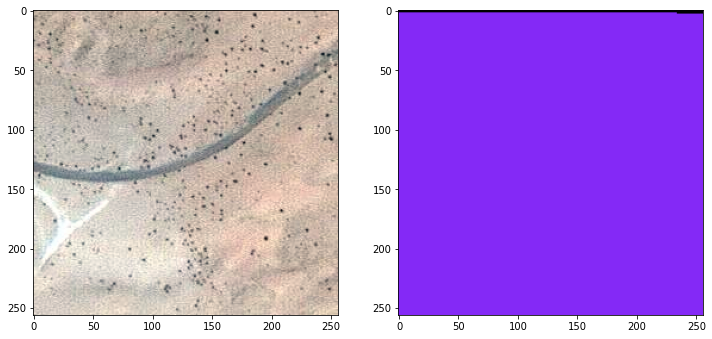

In [7]:
import random
image_num=random.randint(0,len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_num], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_num], (patch_size, patch_size, 3)))
plt.show()

In [8]:
#Now Hex to RGB Conversion
value=int('3C',base=16)
print(value)

60


In [9]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

In [10]:
#label=single_patch_mask
#Now we will create a function that will convert mask with hexadecimal to integer values
def color2label(label):
  label_seg=np.zeros(label.shape,dtype=np.uint8)
  label_seg[np.all(label==Building,axis=-1)]=0
  label_seg[np.all(label==Land,axis=-1)]=1
  label_seg[np.all(label==Road,axis=-1)]=2
  label_seg[np.all(label==Vegetation,axis=-1)]=3
  label_seg[np.all(label==Water,axis=-1)]=4
  label_seg[np.all(label==Unlabeled,axis=-1)]=5
  label_seg=label_seg[:,:,0]

  return label_seg

In [11]:
#Now we will convert all the masks to labels
labels=[]
for i in range(mask_dataset.shape[0]):
  temp_label=color2label(mask_dataset[i])
  labels.append(temp_label)
#Now converting labels into a numpy array
labels=np.array(labels)
labels=np.expand_dims(labels,axis=3)

print("Unique labels in this dataset are ",np.unique(labels))

Unique labels in this dataset are  [0 1 2 3 4 5]


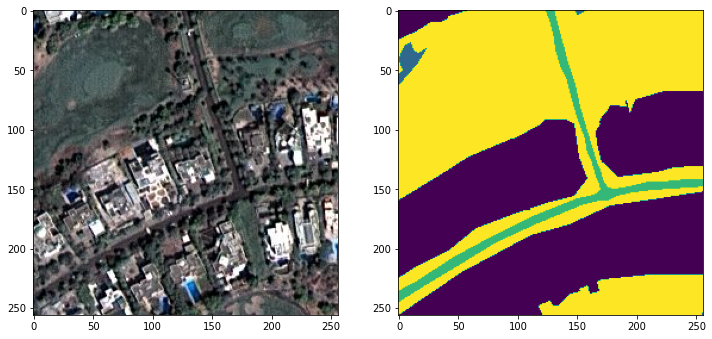

In [12]:
#Another sanity check
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[187])
plt.subplot(122)
plt.imshow(labels[187][:,:,0])
plt.show()

In [13]:
#Now one hot encoding format will be used by me.
num_classes=len(np.unique(labels))
print(num_classes)
from tensorflow.keras.utils import to_categorical
labels_cat=to_categorical(labels,num_classes=num_classes)

6


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(image_dataset,labels_cat,test_size=0.20,random_state=42)
del image_dataset
del mask_dataset
del labels

In [15]:
#Now determining loss function and weights
weights=[0.1666,0.1666,0.1666,0.16666,0.16666,0.16666]

dice_loss=sm.losses.DiceLoss(class_weights=weights)
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss+(1*focal_loss)


In [16]:
img_height=x_train.shape[1]
img_width=x_train.shape[2]
img_channels=x_train.shape[3]
#Checking everything
print(x_train.shape)

(1044, 256, 256, 3)


In [18]:
#Now we will try to input the  model
#Today's lab work completed To tired will work on next day
import simple_unet
#import deeplabv3

In [19]:
#Now defining metrices for your evaluation
metrics=['accuracy',simple_unet.jacard_coef]

In [20]:
from tensorflow.keras.layers import  Conv2D,BatchNormalization,UpSampling2D,Concatenate,Activation,AveragePooling2D
import os
from tensorflow.keras.layers import Input,Conv2DTranspose
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

#Pyramid pooling aspp
#image_pooling->1d conv-->dilated conv with b8=>16=>32
def ASPP(inputs):
  #First entire shape pooling
  shape=inputs.shape
  y_pool=AveragePooling2D(pool_size=(shape[1],shape[2]),name='average_pooling')(inputs)
  y_pool=Conv2D(filters=256,kernel_size=1,use_bias=False,padding='same')(y_pool)
  y_pool=BatchNormalization()(y_pool)
  y_pool=Activation(activation='relu')(y_pool)
  y_pool=UpSampling2D(size=(shape[1],shape[2]),interpolation='bilinear')(y_pool)
  #print(y_pool.shape)

  #Now 1-d Channelwise convolution
  y_1=Conv2D(filters=256,kernel_size=1,use_bias=False,padding='same',dilation_rate=1)(inputs)
  y_1=BatchNormalization()(y_1)
  y_1=Activation(activation='relu')(y_1)
  #Now with dilationrate=6
  y_6=Conv2D(filters=256,kernel_size=3,use_bias=False,padding='same',dilation_rate=6)(inputs)
  y_6=BatchNormalization()(y_6)
  y_6=Activation(activation='relu')(y_6)

  #Now with dilationrate=12
  y_12=Conv2D(filters=256,kernel_size=3,use_bias=False,padding='same',dilation_rate=12)(inputs)
  y_12=BatchNormalization()(y_12)
  y_12=Activation(activation='relu')(y_12)

  #Now with dilation rate=18
  y_18=Conv2D(filters=256,kernel_size=3,use_bias=False,padding='same',dilation_rate=18)(inputs)
  y_18=BatchNormalization()(y_18)
  y_18=Activation(activation='relu')(y_18)

  y=Concatenate()([y_pool,y_1,y_6,y_12,y_18])
  #1-d convolution application
  y=Conv2D(filters=256,kernel_size=1,padding='same',dilation_rate=1,use_bias=False)(y)
  y=BatchNormalization()(y)
  y=Activation(activation='relu')(y)
  print(y.shape)
  return y
def DeepLabv3plus(shape):
  """
  input shape is given as a tuple generate a deeplabv3 model
  """
  input1=Input(shape)
  base_model=ResNet50(include_top=False,weights='imagenet',input_tensor=input1)

  image_features=base_model.get_layer('conv4_block6_out').output

  #Now we will perform atrous asymmetric pyramid pooling
  x_a=ASPP(image_features)
  x_a=UpSampling2D(size=(4,4),interpolation='bilinear')(x_a)
  #Now we will get low level features from our resnet model
  x_b=base_model.get_layer('conv2_block2_out').output
  x_b=Conv2D(filters=48,kernel_size=1,padding='same',use_bias=False)(x_b)
  x_b=BatchNormalization()(x_b)
  x_b=Activation(activation='relu')(x_b)
  #Now we will concatenate
  x=Concatenate()([x_a,x_b])
  print(x.shape)
  #Now apply convolutional layer with 3*3 filter 2 times
  x=Conv2D(filters=256,kernel_size=1,padding='same',use_bias=False)(x)
  x=BatchNormalization()(x)
  x=Activation(activation='relu')(x)

  x=Conv2D(filters=256,kernel_size=1,padding='same',use_bias=False)(x)
  x-BatchNormalization()(x)
  x=Activation(activation='relu')(x)

  x=UpSampling2D(size=(4,4),interpolation='bilinear')(x)
  print(x.shape)
  #outputs
  x=Conv2D(6,(1,1),name='output_layer')(x)
  x=Activation(activation='softmax')(x)
  print(x.shape)
  #Model
  model=Model(inputs=input1,outputs=x)
  return model
if __name__=='__main__':
  shape=(256,256,3)
  model=DeepLabv3plus(shape)
  #model.summary()

94781440/94765736 [==============================] - 3s 0us/step
(None, 16, 16, 256)
(None, 64, 64, 304)
(None, 256, 256, 256)
(None, 256, 256, 6)


In [21]:
model=DeepLabv3plus((256,256,3))
model.compile(optimizer='adam',loss=total_loss,metrics=metrics)
model.summary()

(None, 16, 16, 256)
(None, 64, 64, 304)
(None, 256, 256, 256)
(None, 256, 256, 6)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
          

In [22]:
#Now running the model
history1=model.fit(x_train,y_train,batch_size=8,verbose=1,epochs=35,validation_data=(x_test,y_test),shuffle=False)

Epoch 1/35
131/131 [==============================] - 109s 639ms/step - loss: 0.9363 - accuracy: 0.7701 - jacard_coef: 0.5588 - val_loss: 1.5897 - val_accuracy: 0.0996 - val_jacard_coef: 0.0544
Epoch 2/35
131/131 [==============================] - 75s 571ms/step - loss: 0.9209 - accuracy: 0.8148 - jacard_coef: 0.6255 - val_loss: 1.2258 - val_accuracy: 0.2308 - val_jacard_coef: 0.1405
Epoch 3/35
131/131 [==============================] - 74s 569ms/step - loss: 0.9158 - accuracy: 0.8282 - jacard_coef: 0.6531 - val_loss: 1.5983 - val_accuracy: 0.0987 - val_jacard_coef: 0.0538
Epoch 4/35
131/131 [==============================] - 75s 569ms/step - loss: 0.9101 - accuracy: 0.8431 - jacard_coef: 0.6782 - val_loss: 1.0997 - val_accuracy: 0.5814 - val_jacard_coef: 0.4134
Epoch 5/35
131/131 [==============================] - 74s 566ms/step - loss: 0.9060 - accuracy: 0.8536 - jacard_coef: 0.6965 - val_loss: 1.0996 - val_accuracy: 0.5818 - val_jacard_coef: 0.4150
Epoch 6/35
131/131 [==============

In [25]:
#del image
#del labels_cat
del single_patch_img
del single_patch_mask

In [27]:
from matplotlib import pyplot as plt

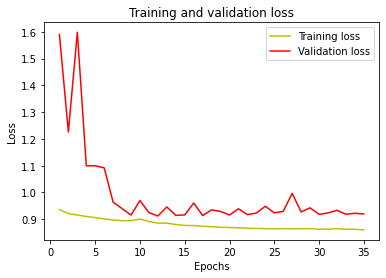

In [28]:
#Now visualizing training and validation loss
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

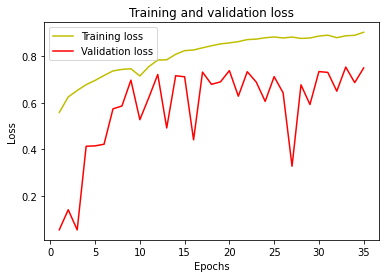

In [29]:
#Now saving our model and checking the output
train_jac=history1.history['jacard_coef']
val_jac=history1.history['val_jacard_coef']
plt.plot(epochs,train_jac, 'y', label='Training loss')
plt.plot(epochs, val_jac, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
#Now measuring the IOU
#At first finding the prediction output
y_pred=model.predict(x_test)
y_pred_max=np.argmax(y_pred,axis=3)
y_test_max=np.argmax(y_test,axis=3)

In [31]:
#importing IOU
from keras.metrics import MeanIoU
iou_mapper=MeanIoU(num_classes=num_classes)
iou_mapper.update_state(y_test_max,y_pred_max)
print("Mean IOU is: ",iou_mapper.result().numpy())

Mean IOU is:  0.59347326


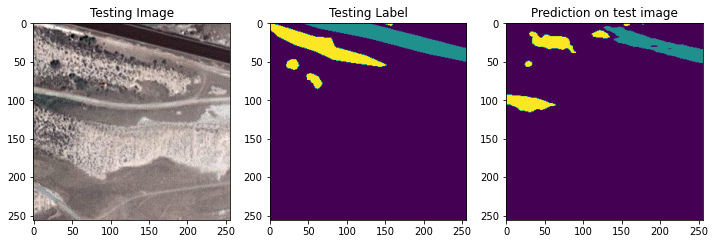

In [32]:
import random

test_img_number=random.randint(0,len(x_test))
test_img=x_test[test_img_number]

test_ground=y_test_max[test_img_number]

test_image_input=np.expand_dims(test_img,0)

prediction=(model.predict(test_image_input))
predicted_image=np.argmax(prediction,axis=3)[0,:,:]
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_ground)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_image)
plt.show()
